In [1]:
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd

## Definition

"households to make optimal consumption/saving decisions at the microeconomic level, given the environment
they are facing. As a result, the evolution of the capital stock will reflect the interactions between
utility-maximizing households (supplying savings) and profit-maximizing firms (demanding
investment). In this model, the saving rate may not be constant anymore."

https://python.quantecon.org/cass_koopmans.html

In [2]:
@njit
def u(c, γ):
    '''
    Utility function
    ASIDE: If you have a utility function that is hard to solve by hand
    you can use automatic or symbolic  differentiation
    See https://github.com/HIPS/autograd
    '''
    if γ == 1:
        # If γ = 1 we can show via L'hopital's Rule that the utility
        # becomes log
        return np.log(c)
    else:
        return c**(1 - γ) / (1 - γ)

@njit
def u_prime(c, γ):
    '''Derivative of utility'''
    if γ == 1:
        return 1 / c
    else:
        return c**(-γ)

@njit
def u_prime_inv(c, γ):
    '''Inverse utility'''
    if γ == 1:
        return c
    else:
        return c**(-1 / γ)

@njit
def f(A, k, α):
    '''Production function'''
    return A * k**α

@njit
def f_prime(A, k, α):
    '''Derivative of production function'''
    return α * A * k**(α - 1)

@njit
def f_prime_inv(A, k, α):
    return (k / (A * α))**(1 / (α - 1))

In [12]:
DatabaseDF = pd.read_csv("../CleanedDataset.csv")

DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
0,0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,...,NaN,660.0,33.55,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,...,NaN,660.0,27.62,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
2,2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,...,NaN,660.0,11.19,OH,NaN,NaN,NaN,NaN,NaN,2006.0
3,3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,...,NaN,660.0,27.85,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
4,4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,...,NaN,660.0,50.88,OH,NaN,NaN,NaN,NaN,NaN,2006.0


In [13]:
spearmancorr = DatabaseDF.corr(method='spearman')
spearmancorr

,Unnamed: 0,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",Best1 Mo BOPD,Best3 Mo BOPD,...,Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
Unnamed: 0,1.000000,0.077660,0.232800,0.381223,0.006677,-0.049775,0.243052,0.198040,0.127087,0.129392,...,0.385105,-0.044463,-0.118379,0.145759,0.203367,0.178904,-0.575608,0.666886,0.176944,0.184971
Lateral Length,0.077660,1.000000,0.435665,0.018391,0.181624,-0.030477,0.326196,0.307917,0.141420,0.142319,...,0.021630,-0.185652,-0.184828,0.177257,0.405629,0.424934,0.028158,0.872082,0.480787,0.312223
Stages,0.232800,0.435665,1.000000,0.052379,0.162301,0.029076,0.658696,0.630845,0.251405,0.244439,...,0.050454,-0.171085,-0.291524,0.340166,0.908350,0.877969,0.301994,0.229416,1.000000,0.648229
Township,0.381223,0.018391,0.052379,1.000000,-0.018511,0.025329,0.010163,-0.021137,-0.174974,-0.165998,...,0.997491,-0.123387,0.036315,-0.165085,0.104709,0.022196,-0.688001,0.666886,-0.172964,-0.039493
Range,0.006677,0.181624,0.162301,-0.018511,1.000000,-0.020666,0.133176,0.274213,-0.121818,-0.144633,...,-0.014452,-0.983496,-0.020250,-0.157996,0.138849,0.162309,0.449071,0.648886,0.164849,0.167011
Section,-0.049775,-0.030477,0.029076,0.025329,-0.020666,1.000000,0.025029,0.021621,0.018478,0.016098,...,-0.036515,0.017142,-0.017271,0.010521,0.039962,0.009927,0.319731,-0.205196,0.008116,0.032135
"Total Prop, lbs",0.243052,0.326196,0.658696,0.010163,0.133176,0.025029,1.000000,0.856374,0.320731,0.331295,...,0.008453,-0.136473,-0.279404,0.440060,0.529296,0.615773,0.424671,0.564288,-0.151921,0.611360
"Fluid, bbls",0.198040,0.307917,0.630845,-0.021137,0.274213,0.021621,0.856374,1.000000,0.282209,0.291956,...,-0.022095,-0.272063,-0.289765,0.401960,0.507377,0.629173,0.680200,-0.205196,-0.066131,0.649717
Best1 Mo BOPD,0.127087,0.141420,0.251405,-0.174974,-0.121818,0.018478,0.320731,0.282209,1.000000,0.970644,...,-0.177390,0.139445,-0.220560,0.891192,0.184210,0.188430,0.204660,-0.820783,0.495085,0.206711
Best3 Mo BOPD,0.129392,0.142319,0.244439,-0.165998,-0.144633,0.016098,0.331295,0.291956,0.970644,1.000000,...,-0.168382,0.161616,-0.225671,0.937187,0.160880,0.202089,0.214894,-0.666886,0.443253,0.206136


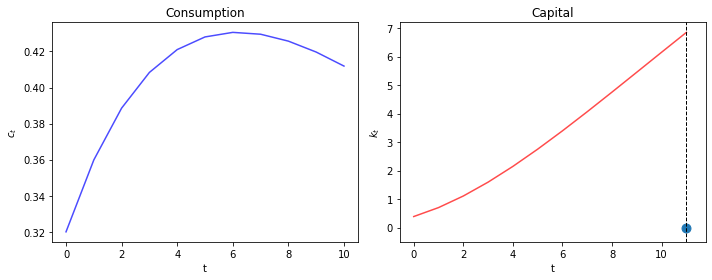

In [3]:
# Parameters
γ = 2.27                    # Took ratio of All factors of production to the feature that influences the production the most
δ = 0.15                    # Depreciation rate used in Solow model
β = (1 / (1+0.07)**(0.31))  # calculation of discount factor
α = 0.39                    # capital used in solow model
A = 1                       # Assume all technology works

# Initial guesses
T = 10
c = np.zeros(T+1)  # T periods of consumption initialized to 0
# T periods of capital initialized to 0 (T+2 to include t+1 variable as well)
k = np.zeros(T+2)
k[0] = 0.39  # Initial k
c[0] = 0.32 # Guess of c_0

@njit
def shooting_method(c, # Initial consumption
                    k,   # Initial capital
                    γ,   # Coefficient of relative risk aversion
                    δ,   # Depreciation rate on capital# Depreciation rate
                    β,   # Discount factor
                    α,   # Return to capital per capita
                    A):  # Technology

    T = len(c) - 1

    for t in range(T):
        # Equation 1 with inequality
        k[t+1] = f(A=A, k=k[t], α=α) + (1 - δ) * k[t] - c[t]
        if k[t+1] < 0:   # Ensure nonnegativity
            k[t+1] = 0

      # Equation 2: We keep in the general form to show how we would
      # solve if we didn't want to do any simplification

        if β * (f_prime(A=A, k=k[t+1], α=α) + (1 - δ)) == np.inf:
            # This only occurs if k[t+1] is 0, in which case, we won't
            # produce anything next period, so consumption will have to be 0
            c[t+1] = 0
        else:
            c[t+1] = u_prime_inv(u_prime(c=c[t], γ=γ) \
            / (β * (f_prime(A=A, k=k[t+1], α=α) + (1 - δ))), γ=γ)

    # Terminal condition calculation
    k[T+1] = f(A=A, k=k[T], α=α) + (1 - δ) * k[T] - c[T]

    return c, k

paths = shooting_method(c, k, γ, δ, β, α, A)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
colors = ['blue', 'red']
titles = ['Consumption', 'Capital']
ylabels = ['$c_t$', '$k_t$']

for path, color, title, y, ax in zip(paths, colors, titles, ylabels, axes):
    ax.plot(path, c=color, alpha=0.7)
    ax.set(title=title, ylabel=y, xlabel='t')

ax.scatter(T+1, 0, s=80)
ax.axvline(T+1, color='k', ls='--', lw=1)

plt.tight_layout()
plt.show()

This compares out intial guess of consumption of the cumulative production to the capital used to produce that oil over a continuous time. 

In [10]:
@njit
def bisection_method(c,
                     k,
                     γ,              # Coefficient of relative risk aversion
                     δ,              # Depreciation rate
                     β,              # Discount factor
                     α,              # Return to capital per capita
                     A,              # Technology
                     tol=1e-4,
                     max_iter=1e4,
                     terminal=0):    # Value we are shooting towards

    T = len(c) - 1
    i = 1                            # Initial iteration
    c_high = f(k=k[0], α=α, A=A)     # Initial high value of c
    c_low = 0                        # Initial low value of c

    path_c, path_k = shooting_method(c, k, γ, δ, β, α, A)

    while (np.abs((path_k[T+1] - terminal)) > tol or path_k[T] == terminal) \
        and i < max_iter:

        if path_k[T+1] - terminal > tol:
            # If assets are too high the c[0] we chose is now a lower bound
            # on possible values of c[0]
            c_low = c[0]
        elif path_k[T+1] - terminal < -tol:
            # If assets fell too quickly, the c[0] we chose is now an upper
            # bound on possible values of c[0]
            c_high=c[0]
        elif path_k[T] == terminal:
            # If assets fell  too quickly, the c[0] we chose is now an upper
            # bound on possible values of c[0]
            c_high=c[0]

        c[0] = (c_high + c_low) / 2  # This is the bisection part
        path_c, path_k = shooting_method(c, k, γ, δ, β, α, A)
        i += 1

    if np.abs(path_k[T+1] - terminal) < tol and path_k[T] != terminal:
        print('Converged successfully on iteration', i-1)
    else:
        print('Failed to converge and hit maximum iteration')

    μ = u_prime(c=path_c, γ=γ)
    return path_c, path_k, μ

Converged successfully on iteration 23


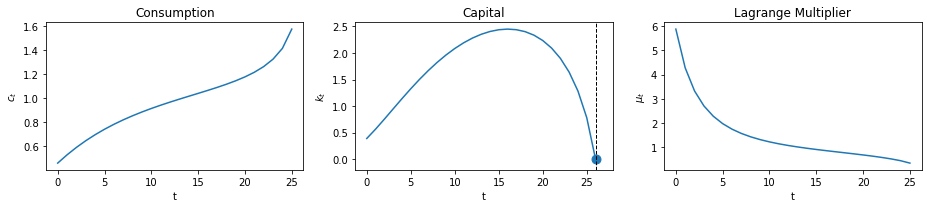

In [11]:
c = np.zeros(T+1) # T periods of consumption initialized to 0
# T periods of capital initialized to 0. T+2 to include t+1 variable as well
k = np.zeros(T+2)

k[0] = 0.39 # initial k
c[0] = 0.32 # our guess of c_0

paths = bisection_method(c, k, γ, δ, β, α, A)

def plot_paths(paths, axes=None, ss=None):

    T = len(paths[0])

    if axes is None:
        fix, axes = plt.subplots(1, 3, figsize=(13, 3))

    ylabels = ['$c_t$', '$k_t$', '$\mu_t$']
    titles = ['Consumption', 'Capital', 'Lagrange Multiplier']

    for path, y, title, ax in zip(paths, ylabels, titles, axes):
        ax.plot(path)
        ax.set(ylabel=y, title=title, xlabel='t')

    # Plot steady state value of capital
    if ss is not None:
        axes[1].axhline(ss, c='k', ls='--', lw=1)

    axes[1].axvline(T, c='k', ls='--', lw=1)
    axes[1].scatter(T, paths[1][-1], s=80)
    plt.tight_layout()

plot_paths(paths)

This uses the application of bisection method. This takes our intial consumption and establish new capital bounds to understand where consumption will fall.

In [12]:
ρ = 1 / β - 1
k_ss = f_prime_inv(k=ρ+δ, A=A, α=α)

print(f'steady state for capital is: {k_ss}')

steady state for capital is: 3.856410590588948


Converged successfully on iteration 40


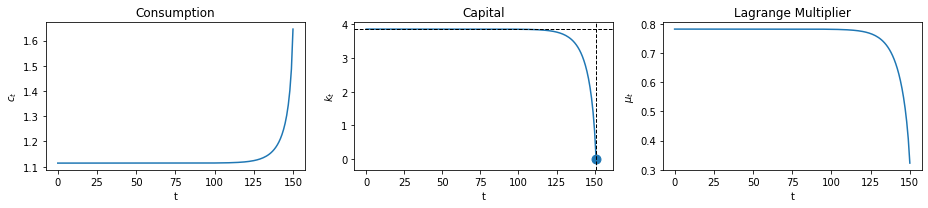

In [13]:
T = 150
c = np.zeros(T+1)
k = np.zeros(T+2)
c[0] = 0.3
k[0] = k_ss  # Start at steady state
paths = bisection_method(c, k, γ, δ, β, α, A)

plot_paths(paths, ss=k_ss)

This helps establish a new initial capital to a steady state. This keeps T and the capital initial value we have establish along with the bounds. 

Converged successfully on iteration 45


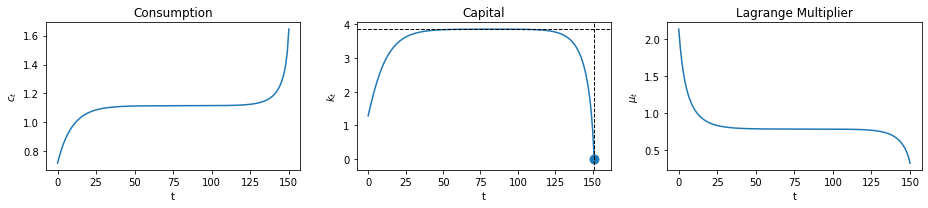

In [14]:
k_init = k_ss / 3   # Below our steady state
T = 150
c = np.zeros(T+1)
k = np.zeros(T+2)
c[0] = 0.3
k[0] = k_init
paths = bisection_method(c, k, γ, δ, β, α, A)

plot_paths(paths, ss=k_ss)

Converged successfully on iteration 45
Converged successfully on iteration 32
Converged successfully on iteration 27
Converged successfully on iteration 21


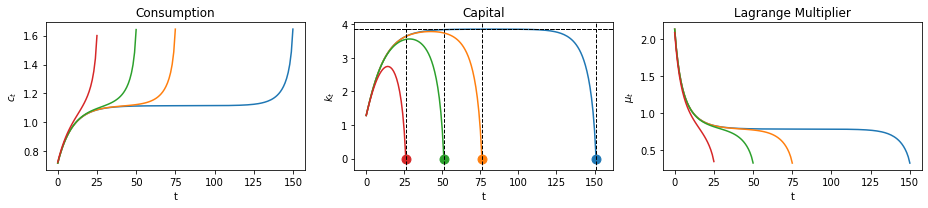

In [15]:
T_list = (150, 75, 50, 25)

fix, axes = plt.subplots(1, 3, figsize=(13, 3))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_init
    paths = bisection_method(c, k, γ, δ, β, α, A)
    plot_paths(paths, ss=k_ss, axes=axes)

We have different iterations to help us understand how the Ramsey-cass model cycles through the consumption of the cumulative production and the capital of the cumulative production. The T can be changed accordingly based on the sample number we want to test out. 